In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel(r"C:\Users\ELCOT\Downloads\IPEDS_data.xlsx")
df.head()

,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
0,100654,Alabama A & M University,2013,35762,Doctor's degree - research/scholarship,Madison County,-86.568502,34.783368,Not applicable,Implied no,...,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0,NaN,NaN
1,100663,University of Alabama at Birmingham,2013,35294-0110,Doctor's degree - research/scholarship and pro...,Jefferson County,-86.809170,33.502230,Not applicable,Implied no,...,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0,24136.0,NaN
2,100690,Amridge University,2013,36117-3553,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.174010,32.362609,Churches of Christ,Implied no,...,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0,NaN,302.0
3,100706,University of Alabama in Huntsville,2013,35899,Doctor's degree - research/scholarship and pro...,Madison County,-86.638420,34.722818,Not applicable,Yes,...,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0,11502.0,NaN
4,100724,Alabama State University,2013,36104-0271,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.295677,32.364317,Not applicable,Implied no,...,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0,13202.0,NaN


In [3]:
df.shape

(1534, 145)

In [4]:
df.info(max_cols=len(df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 145 columns):
 #    Column                                                                                  Non-Null Count  Dtype  
---   ------                                                                                  --------------  -----  
 0    ID number                                                                               1534 non-null   int64  
 1    Name                                                                                    1534 non-null   object 
 2    year                                                                                    1534 non-null   int64  
 3    ZIP code                                                                                1534 non-null   object 
 4    Highest degree offered                                                                  1534 non-null   object 
 5    County name                                                 

In [5]:
df.isna().sum().sort_values(ascending=False)

Endowment assets (year end) per FTE enrollment (GASB)      1018
SAT Writing 25th percentile score                           820
SAT Writing 75th percentile score                           820
Number of first-time undergraduates - foreign countries     623
Percent of first-time undergraduates - out-of-state         623
                                                           ... 
Level of institution                                          0
Control of institution                                        0
Historically Black College or University                      0
Tribal college                                                0
State abbreviation                                            0
Length: 145, dtype: int64

In [6]:
per_na=df.isna().sum()/len(df)*100

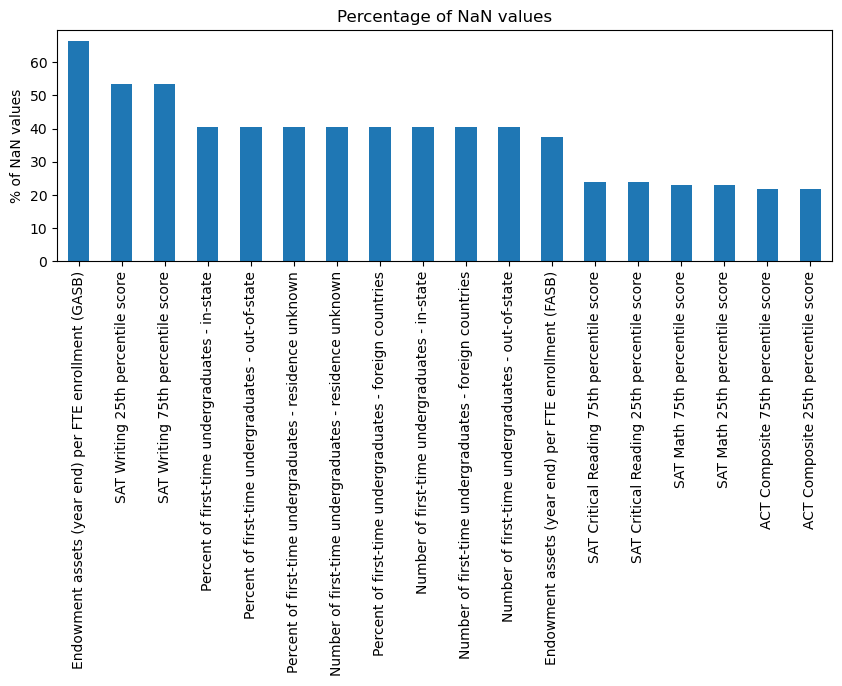

In [7]:
ax=per_na[per_na>=20].sort_values(ascending=False).plot.bar(title='Percentage of NaN values',figsize=(10,3));
ax.set_ylabel('% of NaN values');

In [8]:
colum_off=df.isna().sum()[df.isna().sum()>=(0.2*len(df))]
list_colum_off=colum_off.index.to_list()

In [9]:
df_new=df.copy()

In [10]:
df_new.drop(list_colum_off,axis=1,inplace=True)

In [11]:
for col in df_new.columns:
    print(col)

ID number
Name
year
ZIP code
Highest degree offered
County name
Longitude location of institution
Latitude location of institution
Religious affiliation
Offers Less than one year certificate
Offers One but less than two years certificate
Offers Associate's degree
Offers Two but less than 4 years certificate
Offers Bachelor's degree
Offers Postbaccalaureate certificate
Offers Master's degree
Offers Post-master's certificate
Offers Doctor's degree - research/scholarship
Offers Doctor's degree - professional practice
Offers Doctor's degree - other
Offers Other degree
Applicants total
Admissions total
Enrolled total
Percent of freshmen submitting SAT scores
Percent of freshmen submitting ACT scores
Estimated enrollment, total
Estimated enrollment, full time
Estimated enrollment, part time
Estimated undergraduate enrollment, total
Estimated undergraduate enrollment, full time
Estimated undergraduate enrollment, part time
Estimated freshman undergraduate enrollment, total
Estimated freshman 

In [12]:
interesting_columns=['Name', 'year', 'Highest degree offered', "Offers Bachelor's degree",
       "Offers Master's degree",
       "Offers Doctor's degree - research/scholarship",
       "Offers Doctor's degree - professional practice", 'Applicants total',
       'Admissions total', 'Enrolled total', 'Estimated enrollment, total',
       'Tuition and fees, 2013-14',
       'Total price for in-state students living on campus 2013-14',
       'Total price for out-of-state students living on campus 2013-14',
       'State abbreviation', 'Control of institution','Total  enrollment',
       'Full-time enrollment', 'Part-time enrollment',
       'Undergraduate enrollment', 'Graduate enrollment',
       'Full-time undergraduate enrollment','Part-time undergraduate enrollment',
       'Percent of total enrollment that are women',
       'Percent of undergraduate enrollment that are women',
       'Percent of graduate enrollment that are women',
       'Graduation rate - Bachelor degree within 4 years, total',
       'Graduation rate - Bachelor degree within 5 years, total',
       'Graduation rate - Bachelor degree within 6 years, total',
       ]

In [13]:
df_new=df_new[interesting_columns]

to find the NaN values in the remaining columns,  here getting the 'Total enrollment' because it only can be numbers and also some random important columns to know whether the whole row is NaN or not.

In [14]:
df_new[df_new['Total  enrollment'].isna()][['Name','Applicants total','Admissions total','Enrolled total','Total  enrollment']]

,Name,Applicants total,Admissions total,Enrolled total,Total enrollment
257,University of North Georgia,NaN,NaN,NaN,NaN
1308,Texas A & M University-Galveston,NaN,NaN,NaN,NaN


In [15]:
df_new[df_new['Total  enrollment'].isna()]

,Name,year,Highest degree offered,Offers Bachelor's degree,Offers Master's degree,Offers Doctor's degree - research/scholarship,Offers Doctor's degree - professional practice,Applicants total,Admissions total,Enrolled total,...,Undergraduate enrollment,Graduate enrollment,Full-time undergraduate enrollment,Part-time undergraduate enrollment,Percent of total enrollment that are women,Percent of undergraduate enrollment that are women,Percent of graduate enrollment that are women,"Graduation rate - Bachelor degree within 4 years, total","Graduation rate - Bachelor degree within 5 years, total","Graduation rate - Bachelor degree within 6 years, total"
257,University of North Georgia,2013,Doctor's degree - professional practice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1308,Texas A & M University-Galveston,2013,Doctor's degree - research/scholarship,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the above cell we can see that only 'Name','year','Highest degree offered' have some info while rest of the columns are Nan.The number of the NaN columns are greater than the columns with info so lets drop this rows.

In [16]:
a_=df_new[df_new['Name']=='University of North Georgia'].index[0]
b_=df_new[df_new['Name']=='Texas A & M University-Galveston'].index[0]
df_new=df_new.drop([a_,b_],axis=0)

In [17]:
print('The data frame has {} columns out of the {} original columns and {} rows out of the {} original rows'.format(df_new.shape[1],df.shape[1],df_new.shape[0],df.shape[0]))

The data frame has 29 columns out of the 145 original columns and 1532 rows out of the 1534 original rows


In [18]:
col=df_new.select_dtypes(include=['float64','int64']).columns

In [19]:
lt=list()
for i in col:
    y=any(x < 0 for x in df_new[i])
    if y==True:
        lt.append(y)
print('There are {} negative values in the data frame.'.format(len(lt)))

There are 0 negative values in the data frame.


In [20]:
df_new.describe()

,year,Applicants total,Admissions total,Enrolled total,"Estimated enrollment, total","Tuition and fees, 2013-14",Total price for in-state students living on campus 2013-14,Total price for out-of-state students living on campus 2013-14,Total enrollment,Full-time enrollment,...,Undergraduate enrollment,Graduate enrollment,Full-time undergraduate enrollment,Part-time undergraduate enrollment,Percent of total enrollment that are women,Percent of undergraduate enrollment that are women,Percent of graduate enrollment that are women,"Graduation rate - Bachelor degree within 4 years, total","Graduation rate - Bachelor degree within 5 years, total","Graduation rate - Bachelor degree within 6 years, total"
count,1532.0,1377.000000,1377.000000,1377.000000,1532.000000,1497.000000,1400.000000,1400.000000,1532.000000,1532.000000,...,1532.000000,1532.000000,1532.000000,1532.000000,1532.000000,1522.000000,1269.000000,1476.000000,1476.000000,1476.000000
mean,2013.0,6391.193174,3554.880174,1043.046478,7033.115535,20727.490314,34935.306429,38767.612857,7070.114230,5371.494125,...,5532.885117,1537.229112,4507.738903,1025.146214,57.911227,57.169514,63.109535,37.450542,49.788618,53.189024
std,0.0,8787.469171,4309.457606,1285.165519,9387.648898,12455.805360,13283.049319,10716.524007,9416.538854,7474.494963,...,7242.649546,2765.197979,6042.192662,2121.495422,11.784477,11.886220,14.147092,21.949856,20.256726,19.102511
min,2013.0,0.000000,0.000000,0.000000,68.000000,1032.000000,9768.000000,9768.000000,66.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013.0,1488.000000,950.000000,287.000000,1497.250000,8542.000000,22487.000000,31128.000000,1512.750000,1199.000000,...,1328.000000,46.750000,1089.500000,87.000000,52.000000,52.000000,55.000000,20.000000,36.000000,40.000000
50%,2013.0,3350.000000,2056.000000,538.000000,3126.000000,20060.000000,34115.000000,37193.500000,3127.000000,2328.000000,...,2487.500000,471.000000,2066.000000,320.500000,58.000000,57.000000,64.000000,34.000000,49.000000,52.500000
75%,2013.0,7016.000000,4203.000000,1246.000000,8376.000000,29992.000000,44835.750000,45907.500000,8376.250000,6080.750000,...,6394.000000,1737.000000,5207.500000,1082.250000,63.000000,62.000000,72.000000,52.250000,63.000000,66.000000
max,2013.0,72676.000000,35815.000000,10241.000000,79576.000000,49138.000000,64988.000000,64988.000000,77338.000000,50012.000000,...,51333.000000,29874.000000,40020.000000,37440.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [21]:
tot_zero=(df_new[df_new.loc[0:]==0]).count().sum()

In [22]:
print('This data frame has {} zero values'.format(tot_zero))

This data frame has 395 zero values


In [23]:
df_new.replace(0,np.nan,inplace=True)

In [24]:
tot_zero2=(df_new[df_new.loc[0:]==0]).count().sum()

In [25]:
print('This data frame has {} zero values'.format(tot_zero2))

This data frame has 0 zero values


In [26]:
df_new[['Name','Applicants total']].sort_values('Applicants total').head()

,Name,Applicants total
1343,Goddard College,4.0
331,Shimer College,28.0
1500,Trine University-Regional/Non-Traditional Camp...,33.0
1479,Brandman University,34.0
1046,Marylhurst University,36.0


In [27]:
for col in df_new.columns:
    print(col)

Name
year
Highest degree offered
Offers Bachelor's degree
Offers Master's degree
Offers Doctor's degree - research/scholarship
Offers Doctor's degree - professional practice
Applicants total
Admissions total
Enrolled total
Estimated enrollment, total
Tuition and fees, 2013-14
Total price for in-state students living on campus 2013-14
Total price for out-of-state students living on campus 2013-14
State abbreviation
Control of institution
Total  enrollment
Full-time enrollment
Part-time enrollment
Undergraduate enrollment
Graduate enrollment
Full-time undergraduate enrollment
Part-time undergraduate enrollment
Percent of total enrollment that are women
Percent of undergraduate enrollment that are women
Percent of graduate enrollment that are women
Graduation rate - Bachelor degree within 4 years, total
Graduation rate - Bachelor degree within 5 years, total
Graduation rate - Bachelor degree within 6 years, total


In [28]:
def remove_space(header):
    
    '''This function takes all the spaces between the words of column names and replaces them
    with '_' . 
    
    The argument header corresponds to a column name. '''
    
    list1=list()
    words_header=header.split()    
    size=int(len(words_header))
    
    for i in range(len(words_header)):
        if i<size-1:
            list1.append(words_header[i]+'_')            
        else:
            list1.append(words_header[i])
                
    separator = ''
    final=separator.join(list1)    
    
    return final

In [29]:
def remove_sp_char(header):
    
    '''This function takes all the special characters found in column names and replaces them
    with other character accordingly to the case. 
    
    The argument header corresponds to a column name. '''
    
    if "'" in header:
        header=header.replace("'",'')
    if "," in header:
        header=header.replace(",",'')
    if "_-_" in header:
        header=header.replace("_-_",'_')
    if "/" in header:
        header=header.replace("/",'_or_')
    if ":" in header:
        header=header.replace(":",'')
    if "-" in header:
        header=header.replace("-",'_')
        
    return header

In [30]:
list_new_head=list()
headers=df_new.columns

for header in headers:
    header1=remove_space(header) # Spaces are replaced.
    header1=header1.casefold()   # All capitalized letters are changed.
    header1=remove_sp_char(header1) # Special characters are replaced.
      
    if "degrese" in header1:    # One column name has a typo.  
        header1=header1.replace("degrese",'degrees')
            
    list_new_head.append(header1)

In [31]:
df_new.columns=list_new_head

In [32]:
df_new.rename(columns={'state_abbreviation':'state'}, inplace=True)

In [33]:
df_new[['state']].head(2)

,state
0,Alabama
1,Alabama


In [34]:
df_new.to_excel('IPEDS_data.xlsx',index=False)

# Exploratory Data analysis (EDA)

In [35]:
df_new.describe()

,year,applicants_total,admissions_total,enrolled_total,estimated_enrollment_total,tuition_and_fees_2013_14,total_price_for_in_state_students_living_on_campus_2013_14,total_price_for_out_of_state_students_living_on_campus_2013_14,total_enrollment,full_time_enrollment,...,undergraduate_enrollment,graduate_enrollment,full_time_undergraduate_enrollment,part_time_undergraduate_enrollment,percent_of_total_enrollment_that_are_women,percent_of_undergraduate_enrollment_that_are_women,percent_of_graduate_enrollment_that_are_women,graduation_rate_bachelor_degree_within_4_years_total,graduation_rate_bachelor_degree_within_5_years_total,graduation_rate_bachelor_degree_within_6_years_total
count,1532.0,1376.000000,1376.000000,1376.000000,1532.000000,1497.000000,1400.000000,1400.000000,1532.000000,1530.000000,...,1522.000000,1269.000000,1519.000000,1495.000000,1529.000000,1518.000000,1268.000000,1457.000000,1468.000000,1469.000000
mean,2013.0,6395.837936,3557.463663,1043.804506,7033.115535,20727.490314,34935.306429,38767.612857,7070.114230,5378.515686,...,5569.237845,1855.819543,4546.317314,1050.517726,58.024853,57.320158,63.159306,37.938916,50.059946,53.442478
std,0.0,8788.972944,4309.957540,1285.324785,9387.648898,12455.805360,13283.049319,10716.524007,9416.538854,7476.855128,...,7252.465825,2939.482145,6053.531083,2141.386454,11.512998,11.533174,14.041089,21.668924,19.974502,18.790730
min,2013.0,4.000000,4.000000,2.000000,68.000000,1032.000000,9768.000000,9768.000000,66.000000,1.000000,...,11.000000,1.000000,1.000000,2.000000,3.000000,8.000000,9.000000,1.000000,2.000000,2.000000
25%,2013.0,1491.750000,951.500000,287.000000,1497.250000,8542.000000,22487.000000,31128.000000,1512.750000,1200.750000,...,1347.000000,216.000000,1119.500000,98.500000,52.000000,52.000000,55.000000,21.000000,36.000000,41.000000
50%,2013.0,3360.000000,2056.000000,538.000000,3126.000000,20060.000000,34115.000000,37193.500000,3127.000000,2331.500000,...,2516.500000,728.000000,2087.000000,336.000000,58.000000,57.000000,64.000000,34.000000,49.000000,53.000000
75%,2013.0,7020.500000,4207.500000,1246.500000,8376.000000,29992.000000,44835.750000,45907.500000,8376.250000,6094.250000,...,6443.000000,2180.000000,5251.500000,1101.500000,63.000000,62.000000,72.000000,53.000000,63.250000,66.000000
max,2013.0,72676.000000,35815.000000,10241.000000,79576.000000,49138.000000,64988.000000,64988.000000,77338.000000,50012.000000,...,51333.000000,29874.000000,40020.000000,37440.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [36]:
df_new.head()

,name,year,highest_degree_offered,offers_bachelors_degree,offers_masters_degree,offers_doctors_degree_research_or_scholarship,offers_doctors_degree_professional_practice,applicants_total,admissions_total,enrolled_total,...,undergraduate_enrollment,graduate_enrollment,full_time_undergraduate_enrollment,part_time_undergraduate_enrollment,percent_of_total_enrollment_that_are_women,percent_of_undergraduate_enrollment_that_are_women,percent_of_graduate_enrollment_that_are_women,graduation_rate_bachelor_degree_within_4_years_total,graduation_rate_bachelor_degree_within_5_years_total,graduation_rate_bachelor_degree_within_6_years_total
0,Alabama A & M University,2013,Doctor's degree - research/scholarship,Yes,Yes,Yes,Implied no,6142.0,5521.0,1104.0,...,4051.0,969.0,3799.0,252.0,55.0,51.0,69.0,10.0,23.0,29.0
1,University of Alabama at Birmingham,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,5689.0,4934.0,1773.0,...,11502.0,7066.0,8357.0,3145.0,61.0,58.0,64.0,29.0,46.0,53.0
2,Amridge University,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,...,322.0,309.0,202.0,120.0,58.0,61.0,55.0,NaN,NaN,67.0
3,University of Alabama in Huntsville,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,2054.0,1656.0,651.0,...,5696.0,1680.0,4237.0,1459.0,44.0,44.0,43.0,16.0,37.0,48.0
4,Alabama State University,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,10245.0,5251.0,1479.0,...,5356.0,719.0,4872.0,484.0,61.0,59.0,71.0,9.0,19.0,25.0


In [37]:
df_high=df_new[['name','applicants_total']].sort_values('applicants_total',ascending=False).head(20)
df_high

,name,applicants_total
84,University of California-Los Angeles,72676.0
81,University of California-Berkeley,61717.0
86,University of California-San Diego,60832.0
841,New York University,57845.0
83,University of California-Irvine,56515.0
87,University of California-Santa Barbara,55258.0
77,California State University-Long Beach,55019.0
863,St John's University-New York,51634.0
126,San Diego State University,51163.0
82,University of California-Davis,49820.0


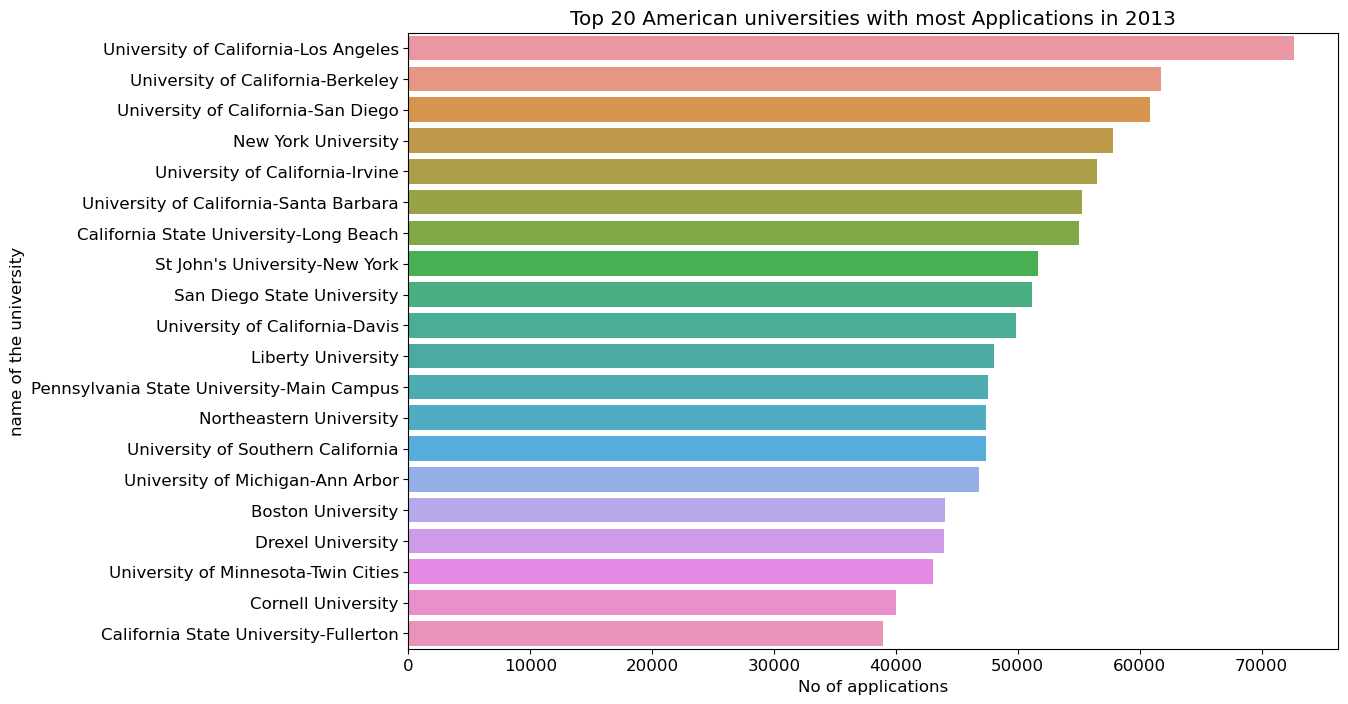

In [38]:
plt.figure(figsize=(12,8))
matplotlib.rcParams["font.size"] = 12
sns.barplot(x='applicants_total',y='name',data=df_high)
plt.title('Top 20 American universities with most Applications in 2013')
plt.xlabel('No of applications')
plt.ylabel('name of the university');

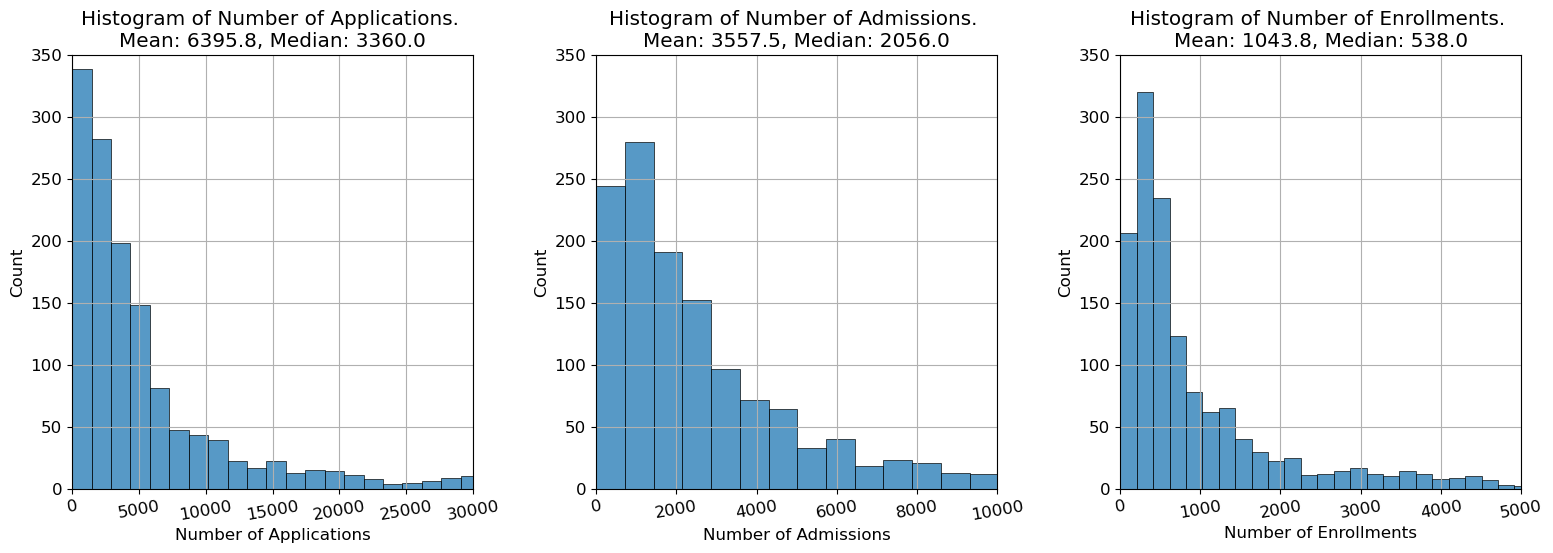

In [39]:
plt.figure(figsize=(16,6))

plt.subplot(1,3,1)
sns.histplot(df_new.applicants_total,bins=50)
plt.title('''Histogram of Number of Applications. 
Mean: {:.1f}, Median: {:.1f}'''.format(df_new.applicants_total.mean(),df_new.applicants_total.median()));
plt.xlabel('Number of Applications')
plt.axis([0,30000,0,350])
plt.xticks(rotation=10)
plt.grid()

plt.subplot(1,3,2)
sns.histplot(df_new.admissions_total,bins=50)
plt.title('''Histogram of Number of Admissions. 
Mean: {:.1f}, Median: {:.1f}'''.format(df_new.admissions_total.mean(),df_new.admissions_total.median()));
plt.axis([0,10000,0,350])
plt.xlabel('Number of Admissions')
plt.xticks(rotation=10)
plt.grid()

plt.subplot(1,3,3)
sns.histplot(df_new.enrolled_total,bins=50)
plt.title('''Histogram of Number of Enrollments. 
Mean: {:.1f}, Median: {:.1f}'''.format(df_new.enrolled_total.mean(),df_new.enrolled_total.median()));
plt.axis([0,5000,0,350])
plt.xlabel('Number of Enrollments')
plt.grid()
plt.xticks(rotation=10)
plt.tight_layout(pad=2);

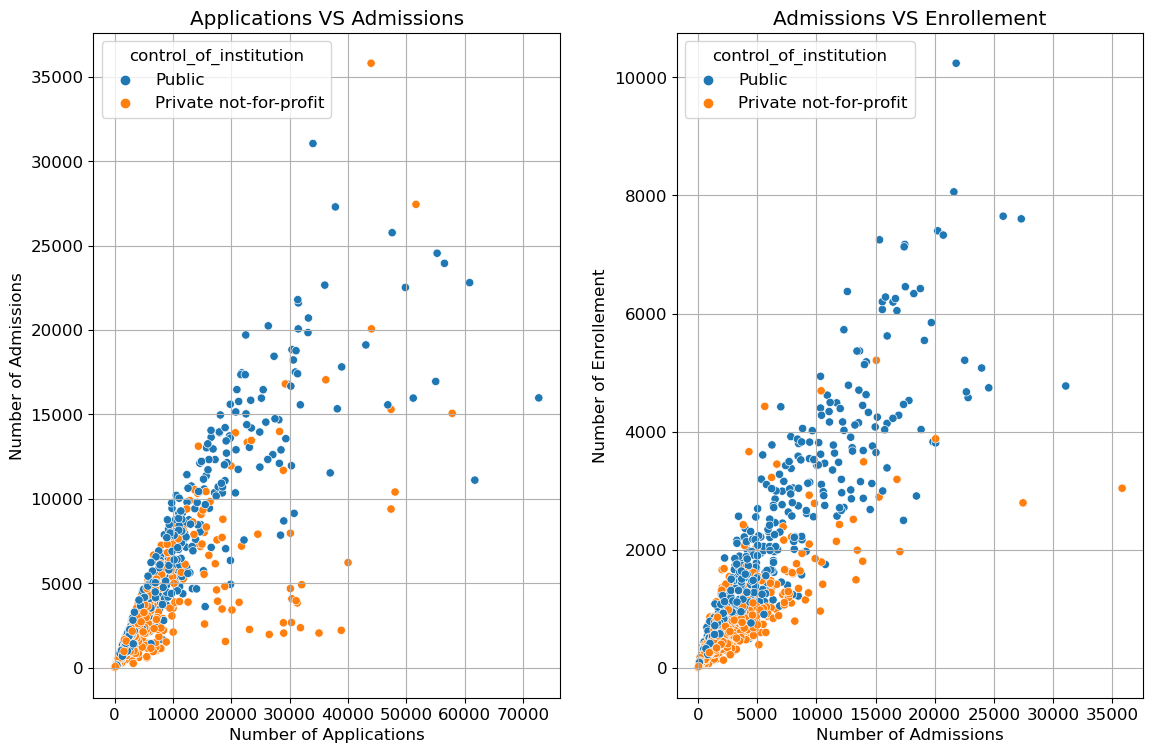

In [40]:
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
plt.title('Applications VS Admissions')
sns.scatterplot(x=df_new.applicants_total,y=df_new.admissions_total,hue=df_new.control_of_institution)
plt.xlabel('Number of Applications')
plt.ylabel('Number of Admissions')
plt.grid()

plt.subplot(1,2,2)
plt.title('Admissions VS Enrollement')
sns.scatterplot(y='enrolled_total',x='admissions_total',data=df_new,hue='control_of_institution')
plt.ylabel('Number of Enrollement')
plt.xlabel('Number of Admissions')
plt.grid()

plt.tight_layout(pad=2);

In [41]:
df_new['acceptance_rate']=(df_new.admissions_total/df_new.applicants_total*100).round(2)
df_new['enroll_rate']=(df_new.enrolled_total/df_new.admissions_total*100).round(2)


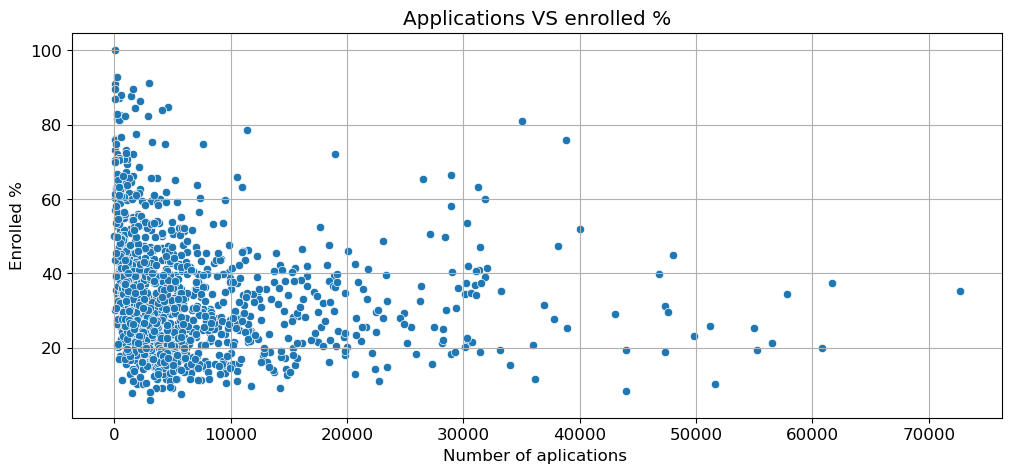

In [42]:
plt.figure(figsize=(12,5))
plt.title('Applications VS enrolled %')
sns.scatterplot(x='applicants_total',y='enroll_rate',data=df_new)
plt.xlabel('Number of aplications ')
plt.ylabel('Enrolled %')
plt.grid()

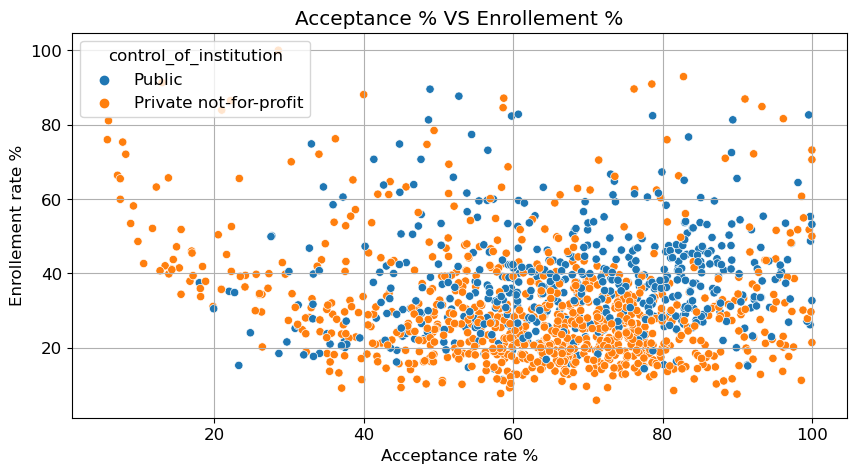

In [43]:
plt.figure(figsize=(10,5))
plt.title('Acceptance % VS Enrollement %')
sns.scatterplot(x='acceptance_rate',y='enroll_rate',data=df_new,hue=df_new.control_of_institution)
plt.xlabel('Acceptance rate %')
plt.ylabel('Enrollement rate %')
plt.grid()

In [44]:
high_acceptance=df_new[df_new.acceptance_rate.notnull()][['name','acceptance_rate','enroll_rate']].sort_values('acceptance_rate',ascending=False).head(25)

In [45]:
low_acceptance=df_new[df_new.acceptance_rate.notnull()][['name','acceptance_rate','enroll_rate']].sort_values('acceptance_rate').head(25)

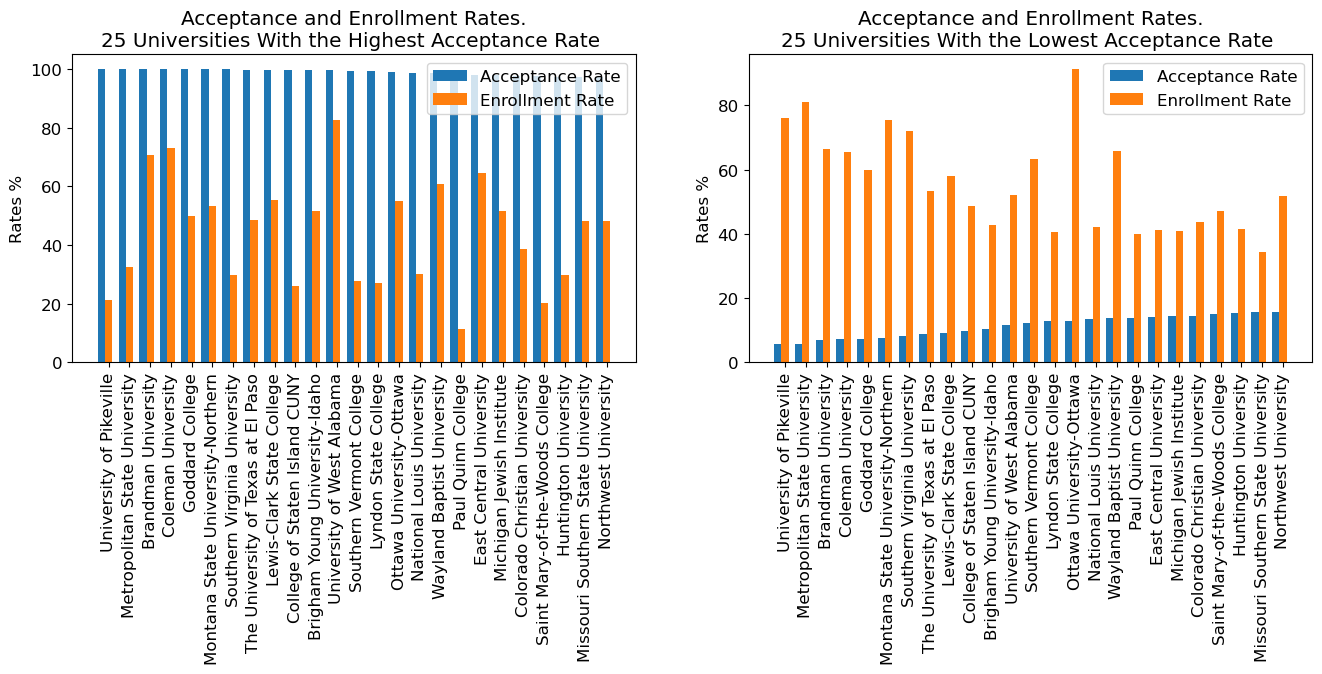

In [46]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
ind = np.arange(len(high_acceptance)) #number of universities
width = 0.35       #space

plt.bar(ind, high_acceptance.acceptance_rate, width, label='Acceptance Rate')
plt.bar(ind + width, high_acceptance.enroll_rate, width,label='Enrollment Rate')
plt.title('''Acceptance and Enrollment Rates.
25 Universities With the Highest Acceptance Rate ''')
plt.ylabel('Rates %')
plt.xticks(ind + width,high_acceptance.name.values,rotation=90 )
plt.legend(loc='best');

plt.subplot(1,2,2)
ind = np.arange(len(low_acceptance)) #number of universities
width = 0.35       #space

plt.bar(ind, low_acceptance.acceptance_rate, width, label='Acceptance Rate')
plt.bar(ind + width, low_acceptance.enroll_rate, width,label='Enrollment Rate')
plt.title('''Acceptance and Enrollment Rates.
25 Universities With the Lowest Acceptance Rate ''')
plt.ylabel('Rates %')
plt.xticks(ind + width,high_acceptance.name.values,rotation=90 )
plt.legend(loc='best');

In [47]:
df_private_uni=df_new[df_new.control_of_institution=='Private not-for-profit']
df_private_uni=df_private_uni[df_private_uni.applicants_total.notnull()]

In [48]:
df_public_uni=df_new[df_new.control_of_institution=='Public']
df_public_uni=df_public_uni[df_public_uni.applicants_total.notnull()]

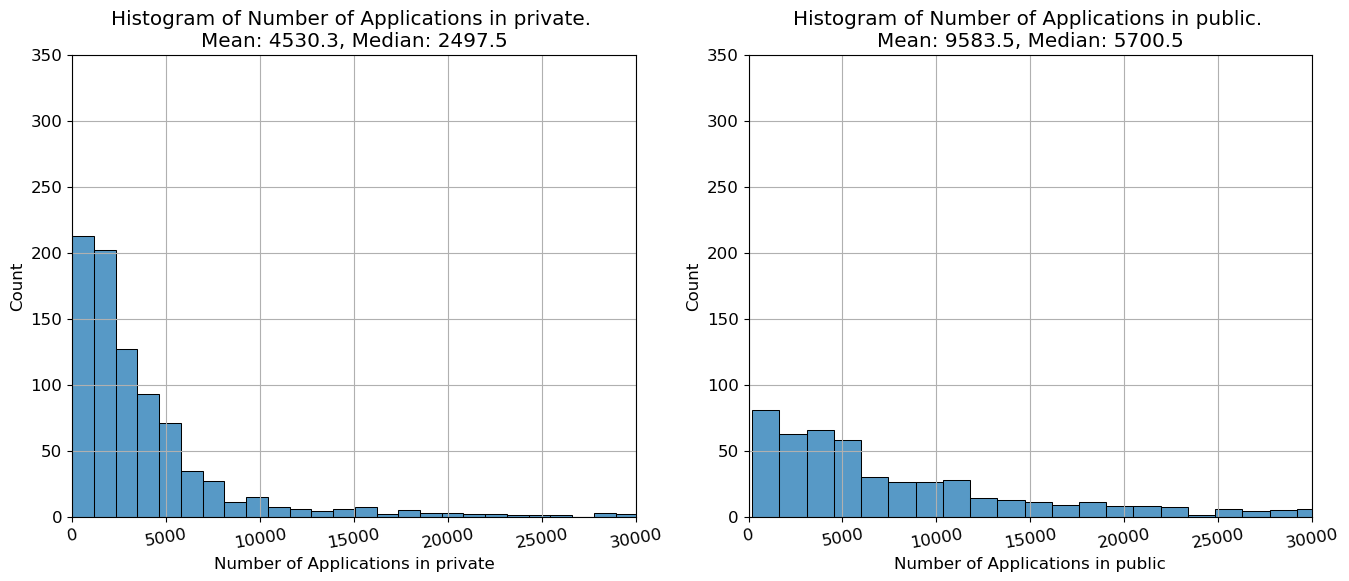

In [49]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
sns.histplot(df_private_uni.applicants_total,bins=50)
plt.title('''Histogram of Number of Applications in private. 
Mean: {:.1f}, Median: {:.1f}'''.format(df_private_uni.applicants_total.mean(),df_private_uni.applicants_total.median()));
plt.xlabel('Number of Applications in private')
plt.axis([0,30000,0,350])
plt.xticks(rotation=10)
plt.grid()

plt.subplot(1,2,2)
sns.histplot(df_public_uni.applicants_total,bins=50)
plt.title('''Histogram of Number of Applications in public. 
Mean: {:.1f}, Median: {:.1f}'''.format(df_public_uni.applicants_total.mean(),df_public_uni.applicants_total.median()));
plt.xlabel('Number of Applications in public')
plt.axis([0,30000,0,350])
plt.xticks(rotation=10)
plt.grid()

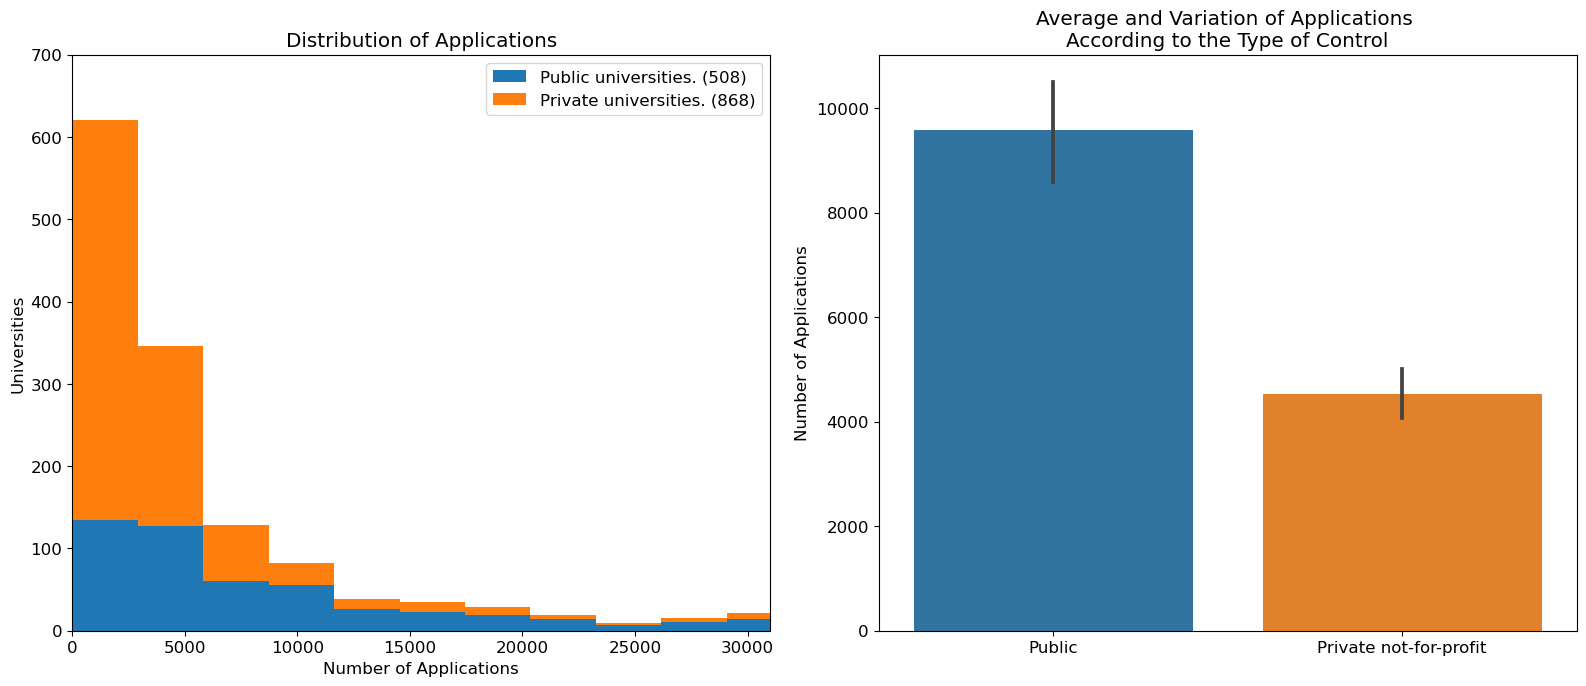

In [50]:
plt.figure(figsize=(16,7))

plt.subplot(1,2,1)
plt.hist([df_public_uni.applicants_total,df_private_uni.applicants_total],stacked=True,bins=25)
plt.axis([0,31000,0,700])
plt.title('Distribution of Applications')
plt.xlabel('Number of Applications')
plt.ylabel('Universities')
plt.legend(['Public universities. ({})'.format(len(df_public_uni)),'Private universities. ({})'.format(len(df_private_uni))]);

plt.subplot(1,2,2)
sns.barplot(x=df_new.control_of_institution,y=df_new.applicants_total);
plt.title('''Average and Variation of Applications 
According to the Type of Control''')
plt.xlabel('')
plt.ylabel('Number of Applications');
plt.tight_layout(pad=1)

In [51]:
print('The minimum number of applications for private universities are {} whereas for the public universities are {}'.format(int(df_private_uni.applicants_total.min()),int(df_public_uni.applicants_total.min())))

The minimum number of applications for private universities are 4 whereas for the public universities are 193


In [52]:
print('The maximun number of applications for the private universities are {} whereas for the public universities are {}'.format(int(df_private_uni.applicants_total.max()),int(df_public_uni.applicants_total.max())))

The maximun number of applications for the private universities are 57845 whereas for the public universities are 72676


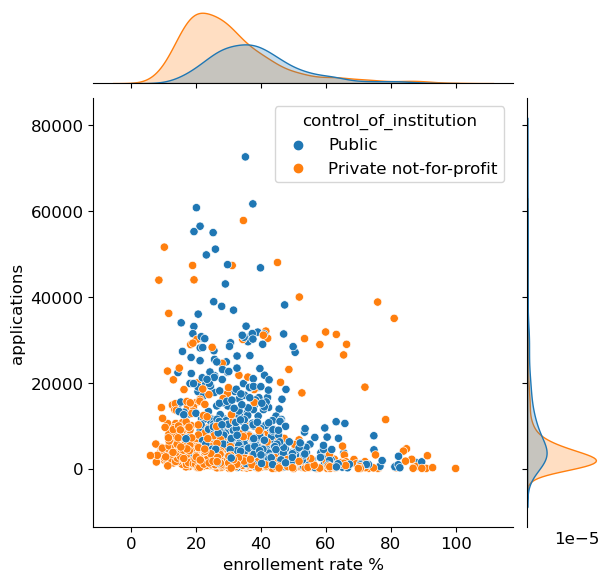

In [53]:
g=sns.jointplot(x='enroll_rate',y='applicants_total',data=df_new,hue='control_of_institution',height=6)
g=(g.set_axis_labels('enrollement rate %','applications'));

Q: Do Students prefer public or private universities?
After all the analysis, we conclude that students mostly prefer public universities over private universities.

In [54]:
df_new[['tuition_and_fees_2013_14']].head()

,tuition_and_fees_2013_14
0,7182.0
1,7206.0
2,6870.0
3,9192.0
4,8720.0


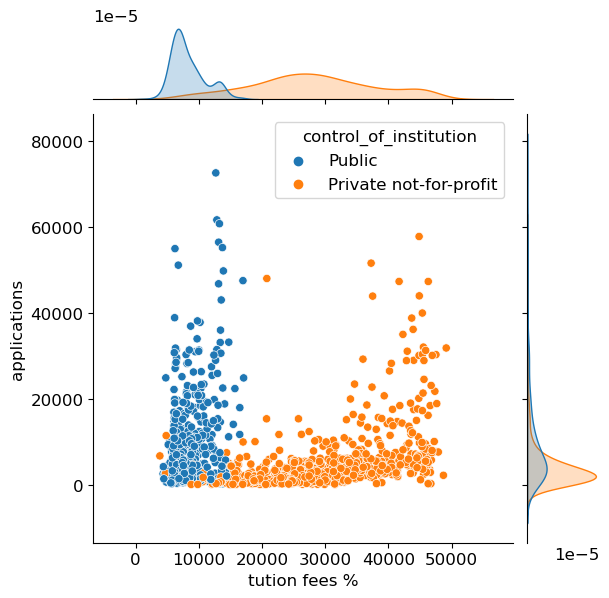

In [55]:
g=sns.jointplot(x='tuition_and_fees_2013_14',y='applicants_total',data=df_new,hue='control_of_institution',height=6)
g=(g.set_axis_labels('tution fees %','applications'));

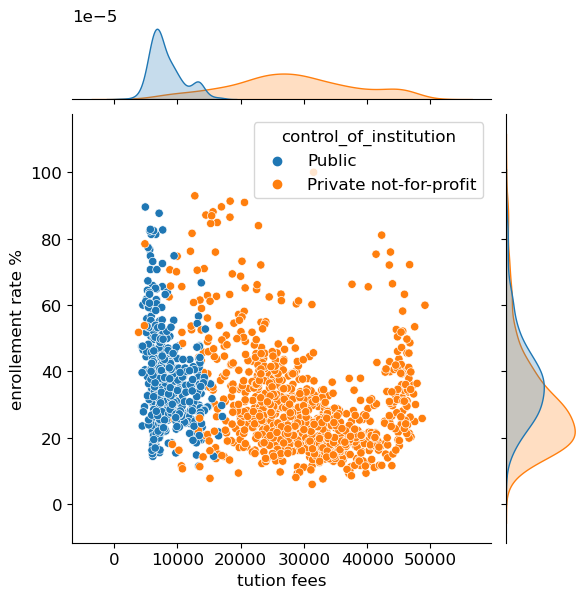

In [56]:
g=sns.jointplot(x='tuition_and_fees_2013_14',y='enroll_rate',data=df_new,hue='control_of_institution',height=6)
g=(g.set_axis_labels('tution fees','enrollement rate %'));

Q: Do Students prefer universities with low tuition and fees?
from the above analysis the answer is Yes, majority of the students prefer universities with affordable tuition and fees.In addition most of the universities with affordable tuition and fees are public universities.

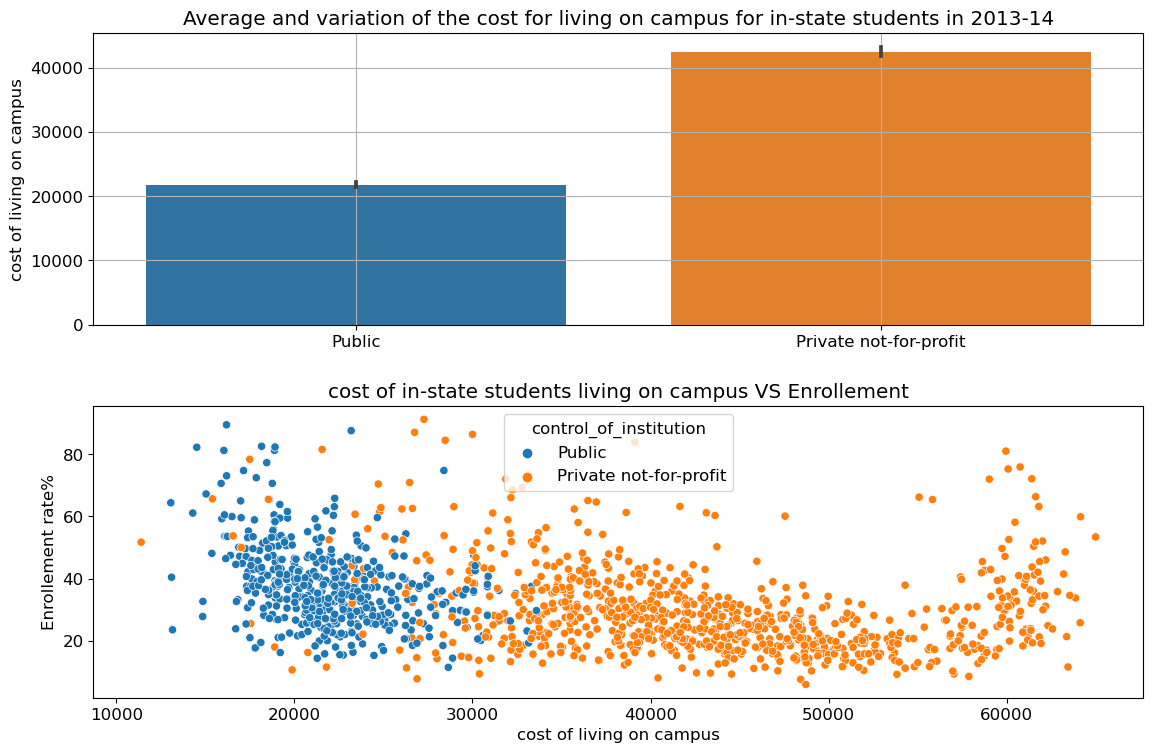

In [57]:
plt.figure(figsize=(12,8))

plt.subplot(2,1,1)
plt.title('Average and variation of the cost for living on campus for in-state students in 2013-14')
sns.barplot(y=df_new.total_price_for_in_state_students_living_on_campus_2013_14,x=df_new.control_of_institution)
plt.xlabel('')
plt.ylabel('cost of living on campus')
plt.grid()

plt.subplot(2,1,2)
plt.title('cost of in-state students living on campus VS Enrollement')
sns.scatterplot(y='enroll_rate',x='total_price_for_in_state_students_living_on_campus_2013_14',data=df_new,hue='control_of_institution')
plt.ylabel('Enrollement rate%')
plt.xlabel('cost of living on campus')

plt.tight_layout(pad=2)

This shows the students look for universities that offer affordable cost of living on campus for in-state students.

In [58]:
df_new[['total_price_for_out_of_state_students_living_on_campus_2013_14']].head()

,total_price_for_out_of_state_students_living_on_campus_2013_14
0,27441.0
1,31687.0
2,NaN
3,35780.0
4,25222.0


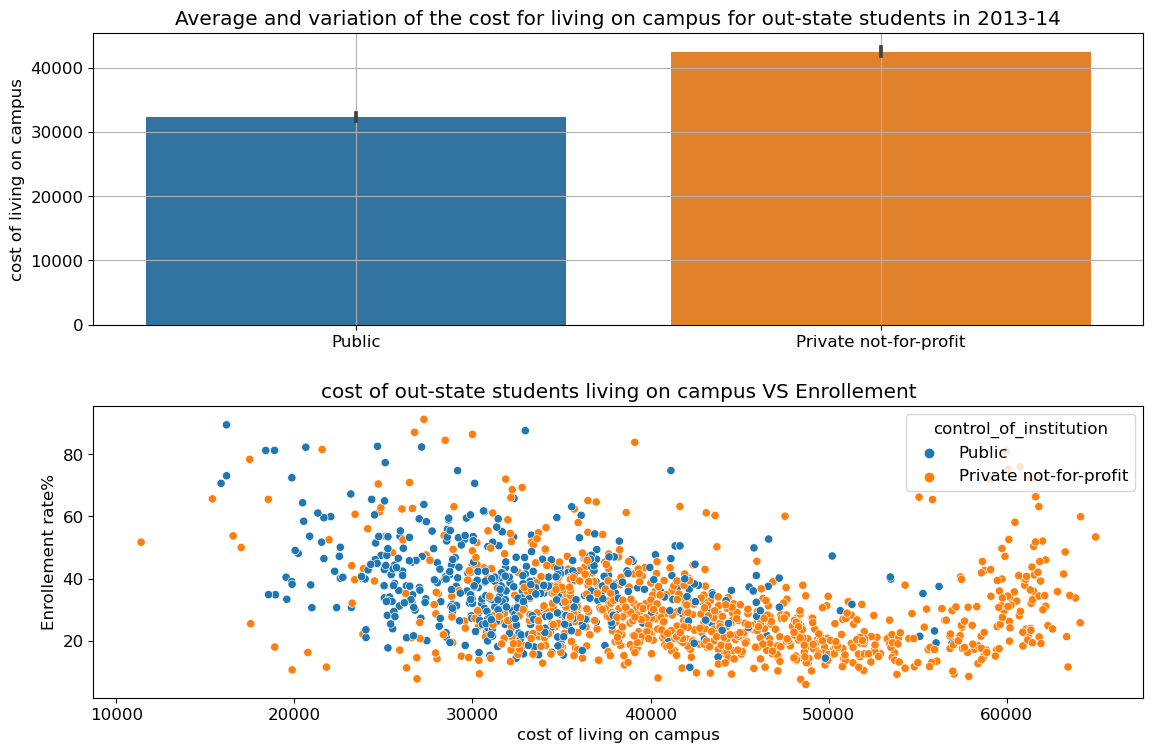

In [59]:
plt.figure(figsize=(12,8))

plt.subplot(2,1,1)
plt.title('Average and variation of the cost for living on campus for out-state students in 2013-14')
sns.barplot(y=df_new.total_price_for_out_of_state_students_living_on_campus_2013_14,x=df_new.control_of_institution)
plt.xlabel('')
plt.ylabel('cost of living on campus')
plt.grid()

plt.subplot(2,1,2)
plt.title('cost of out-state students living on campus VS Enrollement')
sns.scatterplot(y='enroll_rate',x='total_price_for_out_of_state_students_living_on_campus_2013_14',data=df_new,hue='control_of_institution')
plt.ylabel('Enrollement rate%')
plt.xlabel('cost of living on campus')

plt.tight_layout(pad=2)

Therefore, students prefer universities that offer an affordable cost of living on campus for out-state students.

In [60]:
in_state_df=df_new[['name','enroll_rate','total_price_for_in_state_students_living_on_campus_2013_14','control_of_institution','state']]
in_state_df=in_state_df.rename(columns={'total_price_for_in_state_students_living_on_campus_2013_14':'price_living'})
in_state_df['from']='In-State'

In [61]:
out_state_df=df_new[['name','enroll_rate','total_price_for_out_of_state_students_living_on_campus_2013_14','control_of_institution','state']]
out_state_df=out_state_df.rename(columns={'total_price_for_out_of_state_students_living_on_campus_2013_14':'price_living'})
out_state_df['from']='Out-State'

In [62]:
in_out_state_df=in_state_df.append(out_state_df,ignore_index = True)

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_8148\133940734.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  in_out_state_df=in_state_df.append(out_state_df,ignore_index = True)


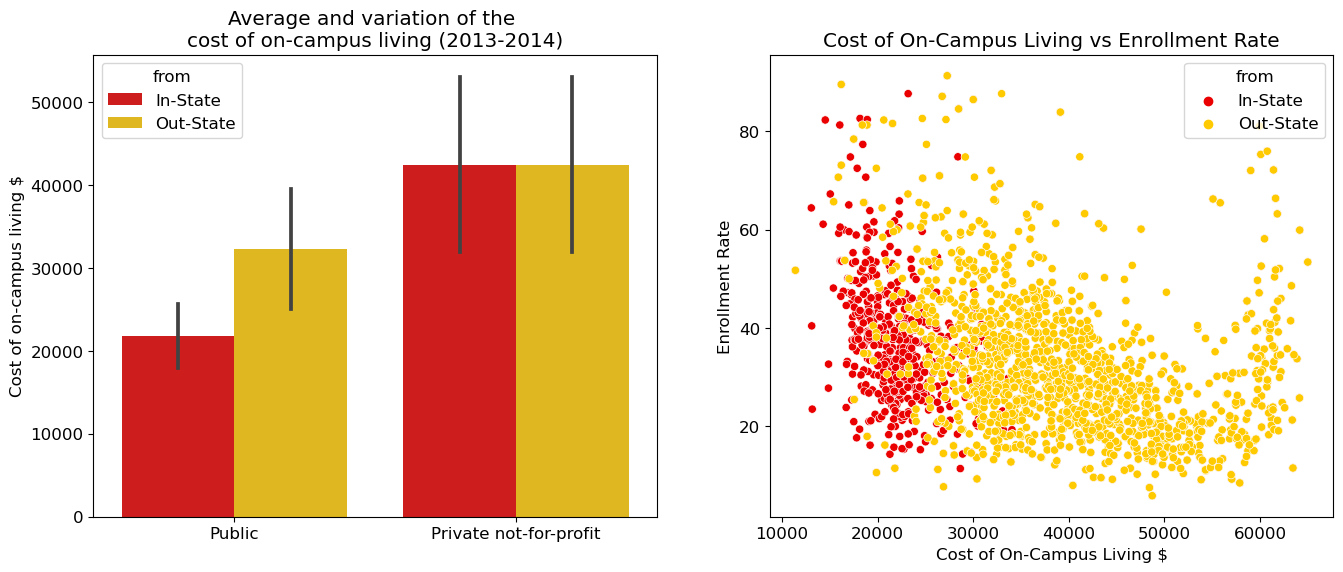

In [63]:
plt.figure(figsize=(16,6))

#with standard deviation
plt.subplot(1,2,1)
sns.barplot(x='control_of_institution',y='price_living',data=in_out_state_df,hue='from',ci="sd",palette='hot');
plt.title('''Average and variation of the 
cost of on-campus living (2013-2014)''')
plt.xlabel('')
plt.ylabel('Cost of on-campus living $')

plt.subplot(1,2,2)
sns.scatterplot(x='price_living',y='enroll_rate',data=in_out_state_df,hue='from',palette='hot')
plt.title('Cost of On-Campus Living vs Enrollment Rate')
plt.xlabel('Cost of On-Campus Living $')
plt.ylabel('Enrollment Rate');

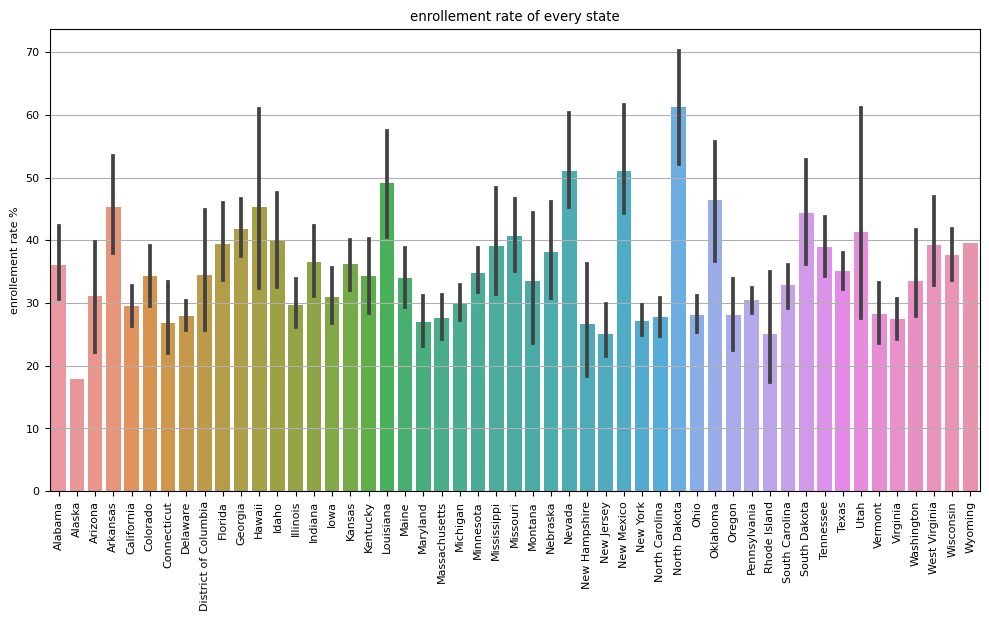

In [64]:
plt.figure(figsize=(12,6))
matplotlib.rcParams["font.size"] = 8
sns.barplot(x='state',y='enroll_rate',data=df_new)
plt.title('enrollement rate of every state')
plt.xlabel('')
plt.ylabel('enrollement rate %')
plt.grid(axis='y')
plt.xticks(rotation=90);

In [65]:
names=df_new.columns[df_new.columns.str.startswith('offers')].values
degree=df_new[df_new[names]=='Yes'][names].count().sort_values(ascending=False)

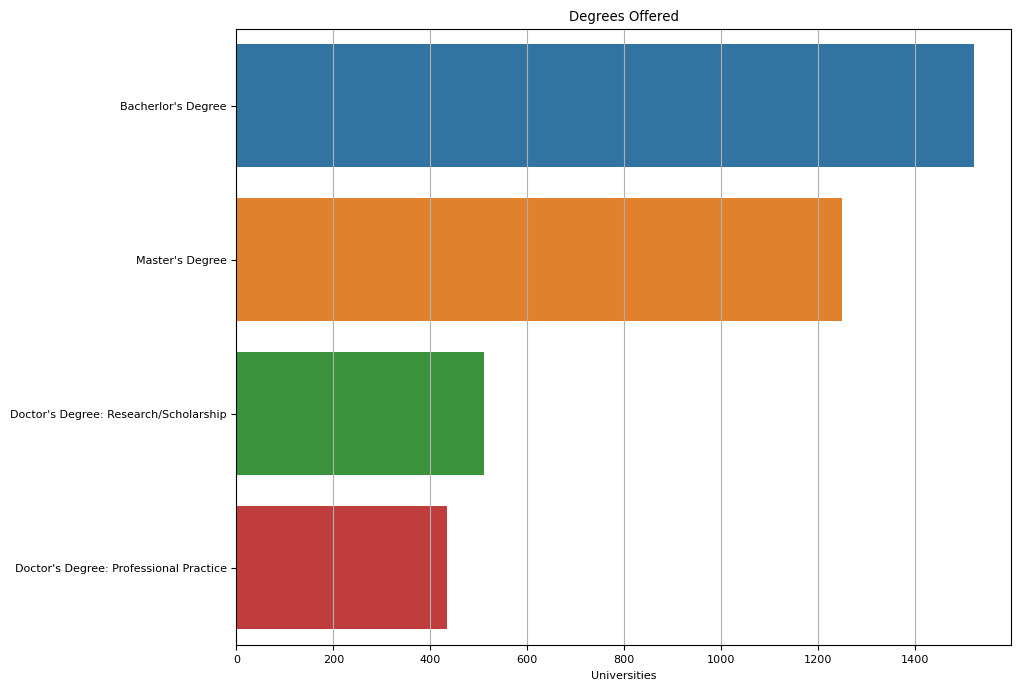

In [66]:
plt.figure(figsize=(10,8))
ax=sns.barplot(x=degree,y=degree.index)
ax.set_yticklabels(("Bacherlor's Degree","Master's Degree",
                    "Doctor's Degree: Research/Scholarship",
                    "Doctor's Degree: Professional Practice"));
plt.title('Degrees Offered')
plt.xlabel('Universities')
plt.grid(axis='x');

In [67]:
hg_degree=df_new.highest_degree_offered.value_counts()

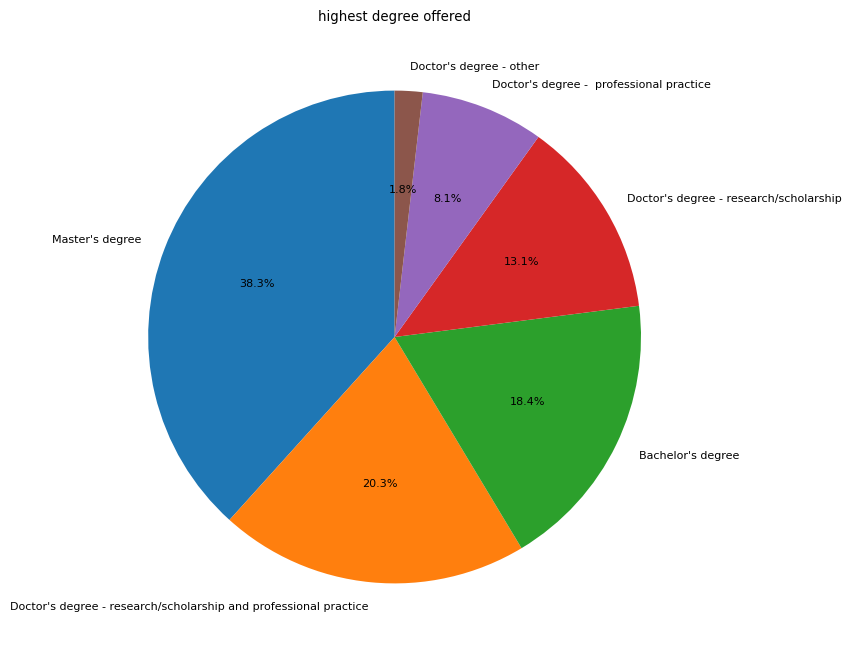

In [68]:
plt.figure(figsize=(12,8))
plt.pie(hg_degree,labels=hg_degree.index,autopct='%.1f%%',startangle=90)
plt.title('highest degree offered');

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_8148\1544879710.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(('''Doctor's Degree:


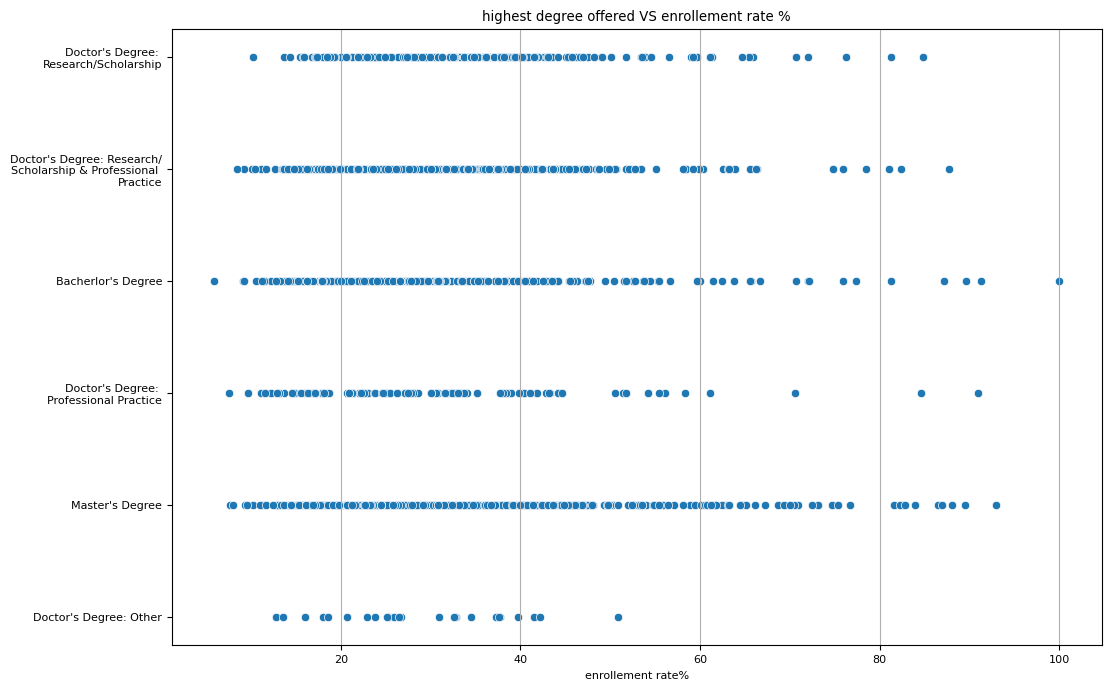

In [69]:
plt.figure(figsize=(12,8))
ax=sns.scatterplot(y='highest_degree_offered',x='enroll_rate',data=df_new)
plt.title('highest degree offered VS enrollement rate %')
plt.xlabel('enrollement rate%')
plt.ylabel('')
plt.grid(axis='x')
ax.set_yticklabels(('''Doctor's Degree: 
Research/Scholarship''',
                    '''Doctor's Degree: Research/
Scholarship & Professional 
Practice''',
                    "Bacherlor's Degree",
                    '''Doctor's Degree: 
Professional Practice''',
                    "Master's Degree",
                    "Doctor's Degree: Other"));